In [1]:
import numpy as np
import random
np.random.seed(42)

In [133]:
Q

{(0, 0): {0: 1, 1: 1},
 (0, 1): {0: 1, 1: 1},
 (0, 2): {0: 1, 1: 1},
 (0, 3): {0: 1, 1: 1},
 (0, 4): {0: 1, 1: 1},
 (0, 5): {0: 1, 1: 1},
 (0, 6): {0: 1, 1: 1},
 (0, 7): {0: 1, 1: 1},
 (0, 8): {0: 1, 1: 1},
 (0, 9): {0: 1, 1: 1},
 (0, 10): {0: 1, 1: 1},
 (0, 11): {0: 1, 1: 1},
 (0, 12): {0: 1, 1: 1},
 (0, 13): {0: 1, 1: 1},
 (0, 14): {0: 1, 1: 1},
 (0, 15): {0: 1, 1: 1},
 (0, 16): {0: 1, 1: 1},
 (0, 17): {0: 1, 1: 1},
 (0, 18): {0: 1, 1: 1},
 (0, 19): {0: 1, 1: 1},
 (0, 20): {0: 1, 1: 1},
 (0, 21): {0: 1, 1: 1},
 (0, 22): {0: 1, 1: 1},
 (0, 23): {0: 1, 1: 1},
 (0, 24): {0: 1, 1: 1},
 (0, 25): {0: 1, 1: 1},
 (0, 26): {0: 1, 1: 1},
 (0, 27): {0: 1, 1: 1},
 (0, 28): {0: 1, 1: 1},
 (0, 29): {0: 1, 1: 1},
 (0, 30): {0: -46.473832192336076, 1: -46.51540080693547},
 (0, 31): {0: 1, 1: 1},
 (0, 32): {0: 1, 1: 1},
 (0, 33): {0: 1, 1: 1},
 (0, 34): {0: 1, 1: 1},
 (0, 35): {0: 1, 1: 1},
 (0, 36): {0: 1, 1: 1},
 (0, 37): {0: 1, 1: 1},
 (0, 38): {0: 1, 1: 1},
 (0, 39): {0: 1, 1: 1},
 (0, 40): {0: 1

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize Q-table as a dictionary
Q = {}
for x in range(24):  # x ranges from 0 to 23
    for y in range(101):  # y ranges from 0 to 100
        Q[(x, y)] = {action: -10 for action in [0, 1]}

# Hyperparameters
alpha = 0.1  # Learning rate 0.1
gamma = 0.99  # Discount factor 0.9
min_epsilon = 0.1  # Minimum exploration rate
initial_epsilon = 1  # Initial exploration rate
decay_rate = 0.999  # Decay rate for epsilon
num_episodes = 100000  # Number of episodes
max_battery = 100  # Maximum battery capacity
threshold = 1e-12
threshold_counter = 0

# Sample data for simulation (replace with actual data)
electricity_price_per_unit = np.concatenate([
    np.random.randint(1, 6, size=12), 
    np.random.randint(6, 11, size=12)
])
solar_power_generation = np.concatenate([
    np.zeros(6), 
    np.random.randint(1, 11, size=12), 
    np.zeros(6)
])
electricity_demand = np.concatenate([
    np.random.randint(3, 12, size=6), 
    np.random.randint(12, 20, size=12), 
    np.random.randint(3, 12, size=6)
])

# ε-greedy policy function
def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1])  # Explore: choose a random action
    else:
        return max(Q[state], key=Q[state].get)  # Exploit: choose best action based on Q-values

# Q-Learning algorithm
episode_rewards = []  # List to store the reward for each episode

for episode in range(num_episodes):
    
    state = (0, 30)  # Initial state (time=0, battery=30)
    epsilon = max(min_epsilon, initial_epsilon * (decay_rate ** episode))  # Decay epsilon
    episode_reward = 0  # Track the reward for the episode
    
    while state[0] < 24:  # Ensure the episode ends before reaching time 24
        action = epsilon_greedy_policy(state, Q, epsilon)
        
        if action == 0:  # Charge
            reward = -electricity_price_per_unit[state[0]] * electricity_demand[state[0]]
            next_battery_level = min(max_battery, state[1] + solar_power_generation[state[0]])
        else:  # Discharge
            if state[1] >= electricity_demand[state[0]]:
                reward = 0
                next_battery_level = state[1] - electricity_demand[state[0]]
            else:
                reward = -electricity_price_per_unit[state[0]] * (electricity_demand[state[0]] - state[1])
                next_battery_level = 0
        
        next_state = (state[0] + 1, int(round(next_battery_level)))
        
        # Q-Learning update rule
        if next_state[0] < 24:
            best_next_action = max(Q[next_state], key=Q[next_state].get)
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])
            if abs(alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])) < threshold:
                threshold_counter += 1
        else:
            # For terminal state, update Q-value using only the immediate reward
            Q[state][action] += alpha * (reward - Q[state][action])
            if abs(alpha * (reward - Q[state][action])) < threshold:
                threshold_counter += 1

        state = next_state
        episode_reward += reward  # Accumulate the reward for the episode
    
    episode_rewards.append(episode_reward)
    print(f"Episode {episode + 1}, epsilon: {epsilon:.4f}, reward: {episode_reward}, {threshold_counter}")
    if threshold_counter > 100000:
        break

Episode 1, epsilon: 1.0000, reward: -1273, 0
Episode 2, epsilon: 0.9990, reward: -1285, 0
Episode 3, epsilon: 0.9980, reward: -1308, 0
Episode 4, epsilon: 0.9970, reward: -1254, 0
Episode 5, epsilon: 0.9960, reward: -1411, 0
Episode 6, epsilon: 0.9950, reward: -1308, 0
Episode 7, epsilon: 0.9940, reward: -1310, 0
Episode 8, epsilon: 0.9930, reward: -1229, 0
Episode 9, epsilon: 0.9920, reward: -1228, 0
Episode 10, epsilon: 0.9910, reward: -1224, 0
Episode 11, epsilon: 0.9900, reward: -1314, 0
Episode 12, epsilon: 0.9891, reward: -1364, 0
Episode 13, epsilon: 0.9881, reward: -1231, 0
Episode 14, epsilon: 0.9871, reward: -1232, 0
Episode 15, epsilon: 0.9861, reward: -1206, 0
Episode 16, epsilon: 0.9851, reward: -1243, 0
Episode 17, epsilon: 0.9841, reward: -1350, 0
Episode 18, epsilon: 0.9831, reward: -1293, 0
Episode 19, epsilon: 0.9822, reward: -1315, 0
Episode 20, epsilon: 0.9812, reward: -1169, 0
Episode 21, epsilon: 0.9802, reward: -1303, 0
Episode 22, epsilon: 0.9792, reward: -1319,

Text(0.5, 1.0, 'Median Rewards vs Episodes')

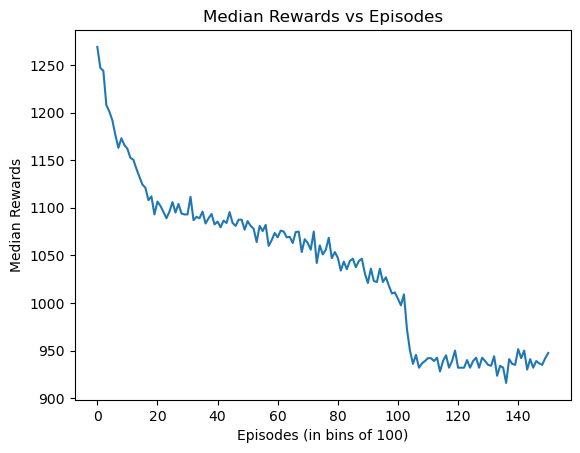

In [25]:
# Calculate medians for bins of 100 episodes 
binned_medians = [-np.median(episode_rewards[i:i + 100]) for i in range(0, len(episode_rewards), 100)] 
# Plotting the binned medians 
plt.plot(binned_medians) 
plt.xlabel('Episodes (in bins of 100)') 
plt.ylabel('Median Rewards') 
plt.title('Median Rewards vs Episodes')

In [31]:
np.max(episode_rewards)

-893